# Jay Bhanushali
## ML-II Lab 4

## Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

## Initializing hyperparams

In [2]:
n_epochs = 300
epochs = list(range(n_epochs))
c = 1

## Functions required to build the NN

In [3]:
def activation(x,w,b):
    y_in = np.dot(w,x) + b
    y_hat = 1/(1+ np.exp(-(y_in)))
    return y_hat

# change in weight (w)
def delta_w(x, y, y_hat):
    dw = c * (-2)* (y-y_hat) * (y_hat*(1-y_hat)) * x
    return dw

# change in bias (b)
def delta_b(y, y_hat):
    db = c * (-2) * (y-y_hat) * (y_hat*(1-y_hat))
    return db

## Input (X) and Output (Y)

In [4]:
X = [0.5, 2.5]
Y = [0.2, 0.9]

## Batch Gradient Descent

In [5]:
def gradient_descent(Xin, Yin):
    ws_gd = []
    w, b = -2, -2
    print(f'Old w: {w}, b: {b}')
    n = len(Xin)
    for epoch in range(n_epochs):
        dw, db = 0,0
        for x,y in zip(Xin,Yin):
            y_hat = activation(x,w,b)
            # print(y_hat)
            if y_hat != y:
                dw += delta_w(x, y, y_hat)
                db += delta_b(y, y_hat)

        w -= dw/n
        b -= db/n
        ws_gd.append(w)

    # print(y_hat)
    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_gd

In [6]:
ws_gd = gradient_descent(X,Y)

Old w: -2, b: -2
New w: 1.733, b: -2.198



In [7]:
def miniBatchGD(Xin,Yin):
    ws_mbgd = []
    w,b = -2, -2
    batchSize = 1
    print(f'Old w: {w}, b: {b}')

    for epoch in epochs:
        dw, db, counter = 0, 0, 0
        for x,y in zip(Xin,Yin):
            y_hat = activation(x,w,b)
            # print(y_hat)
            dw += delta_w(x, y, y_hat)
            db += delta_b(y, y_hat)
            counter += 1
            if counter % batchSize == 0:
                w -= (c * dw)
                b -= (c * db)
        
        ws_mbgd.append(w)
    
    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_mbgd

In [8]:
ws_mbgd = miniBatchGD(X,Y)

Old w: -2, b: -2
New w: 1.792, b: -2.282



In [9]:
def sgdMomentum(Xin, Yin):
    ws_sgdm = []
    w,b = -2, -2
    beta = 0.9
    print(f'Old w: {w}, b: {b}')
    
    for epoch in epochs:
        dw,db,vw,vb = 0,0,0,0
        for x,y in zip(Xin,Yin):
            y_hat = activation(x,w,b)
            # print(y_hat)
            dw += delta_w(x, y, y_hat)
            db += delta_b(y, y_hat)
        vw = beta * vw + (1-beta) * dw
        vb = beta * vb + (1-beta) * db

        w -= c * vw
        b -= c * vb
        ws_sgdm.append(w)
    
    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_sgdm

In [10]:
ws_sgdm = sgdMomentum(X,Y)
plt.show()

Old w: -2, b: -2
New w: -1.413, b: -1.372



In [11]:
def NAG(Xin, Yin):
    ws_nag = []
    beta = 0.9
    w,b = -2, -2
    print(f'Old w: {w}, b: {b}')

    for epoch in epochs:
        dw, db, vw, vb = 0,0,0,0
        for x,y in zip(Xin,Yin):
            vw += beta * vw
            vb += beta * vb
            wt = w - vw
            bt = b - vb
            y_hat = activation(x,w,b)
            # print(y_hat)
            dw += delta_w(x, y, y_hat)
            db += delta_b(y, y_hat)
            w -= c * (beta * vw + (1-beta) * dw)
            b -= c * (beta * vb + (1-beta) * db)
        ws_nag.append(w)

    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_nag

In [12]:
ws_nag = NAG(X,Y)

Old w: -2, b: -2
New w: 0.529, b: -0.649



In [13]:
def adagrad(Xin, Yin):
    eps = 2
    beta = 0.9
    w,b = -2, -2

    ws_adagrad = []
    print(f'Old w: {w}, b: {b}')

    for epoch in epochs:
        dw, db = 0, 0
        for x, y in zip(Xin, Yin):
            y_hat = activation(x,w,b)
            dw += delta_w(x, y, y_hat)
            db += delta_b(y, y_hat)

        w -= (c/(np.sqrt(dw**2 + eps)))*dw
        b -= (c/(np.sqrt(db**2 + eps)))*db

        ws_adagrad.append(w)

    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_adagrad

In [14]:
ws_adagrad = adagrad(X, Y)

Old w: -2, b: -2
New w: 1.776, b: -2.26



## ADA Delta / RMSprop

In [15]:
def adadelta(Xin, Yin):
    eps = 2
    beta = 0.9
    w,b = -2, -2
    
    ws_adaDelta = []
    print(f'Old w: {w}, b: {b}')

    for epoch in epochs:
        dw,db = 0,0
        vw, vb = 0,0
        for x, y in zip(Xin, Yin):
            y_hat = activation(x,w,b)
            dw += delta_w(x, y, y_hat)
            db += delta_b(y, y_hat)

        vw = beta * vw + (1-beta) * dw
        vb = beta * vb + (1-beta) * db

        w = w - (c/(np.sqrt(vw + eps)))*dw**2
        b = b - (c/(np.sqrt(vb  + eps)))*db**2

        ws_adaDelta.append(w)

    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_adaDelta

In [16]:
ws_adaDelta = adadelta(X, Y)

Old w: -2, b: -2
New w: -2.024, b: -2.048



## Adam

In [17]:
def Adam(Xin, Yin):
    eps = 2
    beta1, beta2 = 0.45, 0.85
    w,b = -2, -2
    
    ws_adam = []
    print(f'Old w: {w}, b: {b}')

    for epoch in epochs:
        dw,db = 0,0
        vw, vb = 0,0
        v_ww,v_bb=0,0

        for x, y in zip(Xin, Yin):
            y_hat = activation(x,w,b)
            dw += delta_w(x, y, y_hat)
            db += delta_b(y, y_hat)

        vw = beta1 * vw + (1-beta1) * dw
        vb = beta1 * vb + (1-beta1) * db

        v_ww = beta2 * v_ww + (1-beta2) * dw**2 
        v_bb = beta2 * v_bb + (1-beta2) * db**2

        v_wwh = v_ww/(1-beta2)**epoch
        v_bbh = v_bb/(1-beta2)**epoch

        v_wh = vw/(1-beta1)**epoch
        v_bh = vb/(1-beta1)**epoch

        w = w - (c*v_wh/(np.sqrt(v_wwh+eps)))*dw
        b = b - (c*v_bh/(np.sqrt(v_bbh+eps)))*db
        
        ws_adam.append(w)
    
    print(f'New w: {round(w,3)}, b: {round(b,3)}\n')
    return ws_adam

In [18]:
ws_adam = Adam(X, Y)

Old w: -2, b: -2
New w: -2.008, b: -2.012



## Analysis of all Optimizers

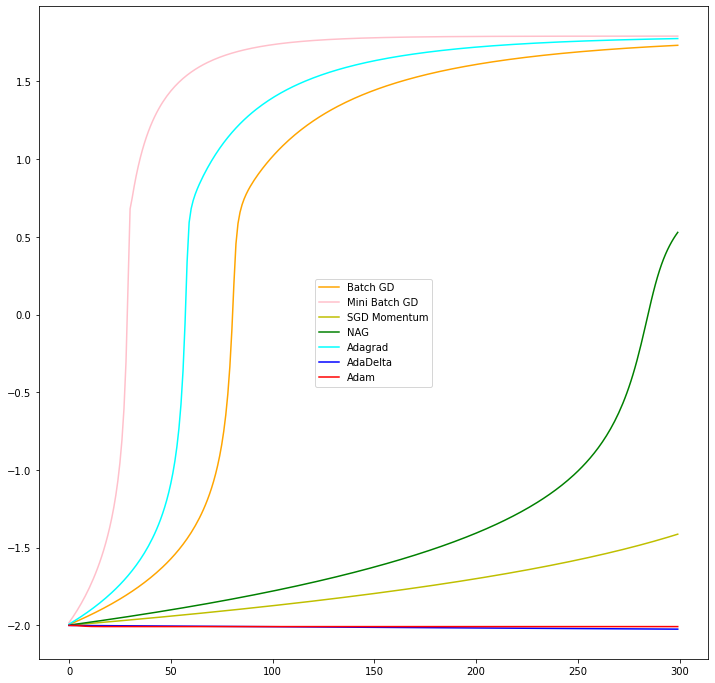

In [19]:
plt.figure(figsize=(12,12))
plt.plot(epochs, ws_gd, color='orange')
plt.plot(epochs, ws_mbgd, color='pink')
plt.plot(epochs, ws_sgdm, color='y')
plt.plot(epochs, ws_nag, color='g')
plt.plot(epochs, ws_adagrad, color='cyan')
plt.plot(epochs, ws_adaDelta, color='b')
plt.plot(epochs, ws_adam, color='r')
plt.legend(["Batch GD", "Mini Batch GD", "SGD Momentum", "NAG", "Adagrad", "AdaDelta", "Adam"], loc ="best")
plt.show()